In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [84]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In this dataset we have to predict the customer is subscribed or not. So it is an Classification problem

In [85]:
df.shape

(31647, 18)

Here we have 31647 rows and 18 columns 

In [86]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

Here we have 0 null values in all the columns

In [87]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

Here we have int datatype in 8 columns and rest with object datatype

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


By observing info there is no null values in the dataset and 8 columns are with int datatype and rest is with object datatype

<AxesSubplot:>

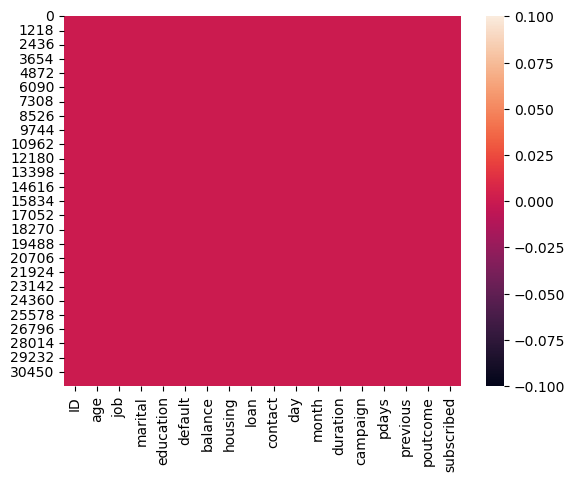

In [89]:
sns.heatmap(df.isnull())

By using heatmap we didnt found any null values

In [90]:
# check the unique values count of each columns

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

Here ID is an unique value so we can drop it. Found unkonwn records in job,education, contact columns

In [91]:
df.drop('ID',axis=1,inplace=True)

In [92]:
df.head()  #dropped the ID column 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [93]:
df.loc[df['job']=="unknown"]   #finding rows where unknown is present

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
63,39,unknown,single,unknown,no,0,no,no,telephone,28,jan,28,1,-1,0,unknown,no
95,53,unknown,married,secondary,no,16,no,no,unknown,9,jun,100,1,-1,0,unknown,no
317,59,unknown,married,unknown,no,1541,no,no,cellular,5,aug,790,1,-1,0,unknown,no
349,40,unknown,married,tertiary,no,119,no,no,cellular,19,aug,258,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30596,51,unknown,single,unknown,no,0,no,no,unknown,5,jun,409,1,-1,0,unknown,no
30636,46,unknown,married,primary,no,110,no,no,unknown,19,jun,113,14,-1,0,unknown,no
30645,59,unknown,divorced,unknown,no,27,no,no,unknown,5,may,347,3,-1,0,unknown,no
31475,33,unknown,single,secondary,no,9,no,no,cellular,19,oct,238,1,-1,0,unknown,no


In [94]:
df.loc[df['education']=="unknown"]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
46,27,technician,single,unknown,no,0,yes,no,cellular,2,feb,168,1,-1,0,unknown,no
61,40,admin.,married,unknown,no,9110,yes,no,telephone,19,nov,89,3,-1,0,unknown,no
63,39,unknown,single,unknown,no,0,no,no,telephone,28,jan,28,1,-1,0,unknown,no
107,48,blue-collar,married,unknown,no,100,yes,no,unknown,29,may,206,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31543,47,blue-collar,married,unknown,no,1660,no,no,cellular,7,aug,187,2,-1,0,unknown,no
31563,30,admin.,married,unknown,no,4,yes,no,cellular,29,jul,176,21,-1,0,unknown,no
31577,48,services,married,unknown,no,1705,yes,no,unknown,5,may,107,1,-1,0,unknown,no
31582,47,services,married,unknown,no,12839,yes,no,cellular,7,may,50,1,171,4,failure,no


In [95]:
df.loc[df['contact']=="unknown"]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
13,39,management,single,secondary,no,1877,yes,no,unknown,6,may,185,1,-1,0,unknown,no
14,43,blue-collar,married,secondary,no,960,yes,no,unknown,15,may,436,1,-1,0,unknown,no
15,41,services,single,secondary,no,260,no,no,unknown,6,jun,75,1,-1,0,unknown,no
16,53,technician,married,secondary,no,719,yes,no,unknown,14,may,230,1,-1,0,unknown,no
20,60,management,married,tertiary,no,328,yes,no,unknown,20,may,72,5,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31633,50,technician,married,tertiary,no,3117,no,no,unknown,9,jun,174,1,-1,0,unknown,no
31634,30,technician,single,tertiary,no,432,yes,yes,unknown,3,jun,180,3,-1,0,unknown,no
31639,38,services,single,secondary,no,570,yes,no,unknown,5,may,75,2,-1,0,unknown,no
31640,43,management,single,secondary,no,2968,no,no,unknown,20,jun,30,4,-1,0,unknown,no


Here where unkown is present in the columns has most of the customers subscription is no

In [96]:
# separating Numerical and categorical columns

#checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print('Categorical columns    :',categorical_col)
print("\n")

#checking for Numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print('Numerical columns    :',numerical_col)  

Categorical columns    : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


Numerical columns    : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [97]:
# checking the unique values of each columns using dataframe

df.nunique().to_frame("Number of Unique Values")

,Number of Unique Values
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3
day,31


Data Visualization


no     27932
yes     3715
Name: subscribed, dtype: int64


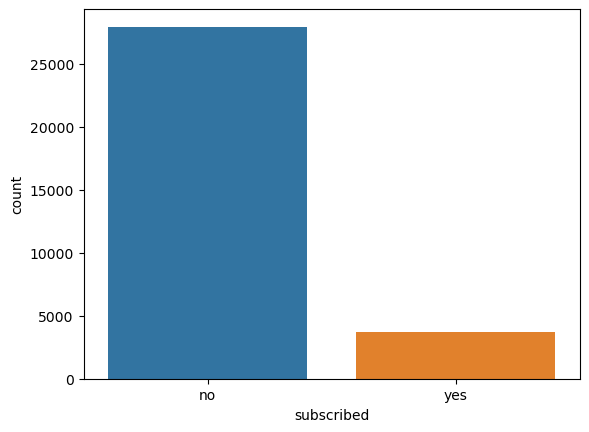

In [98]:
ax=sns.countplot(x='subscribed',data=df)
print(df['subscribed'].value_counts())

Here is huge differnence between yes and no which can be rectified by using oversampling

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


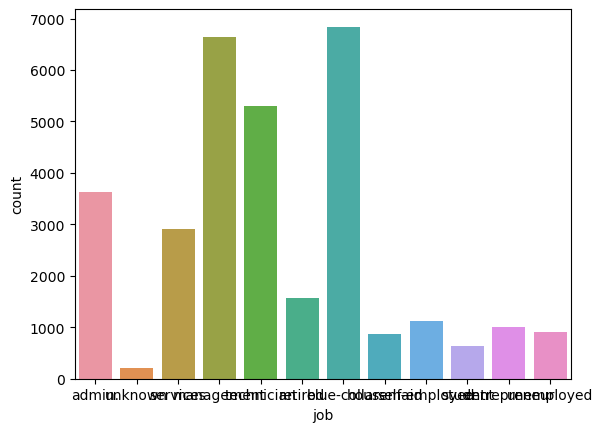

In [99]:
print(df["job"].value_counts())
ax=sns.countplot(x="job",data=df)
plt.show()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


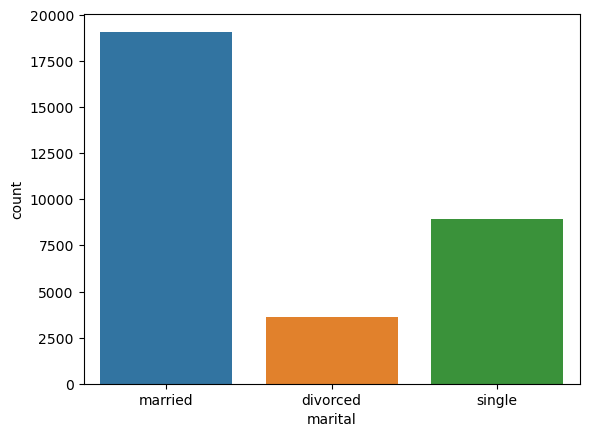

In [100]:
print(df["marital"].value_counts())
ax=sns.countplot(x="marital",data=df)
plt.show()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


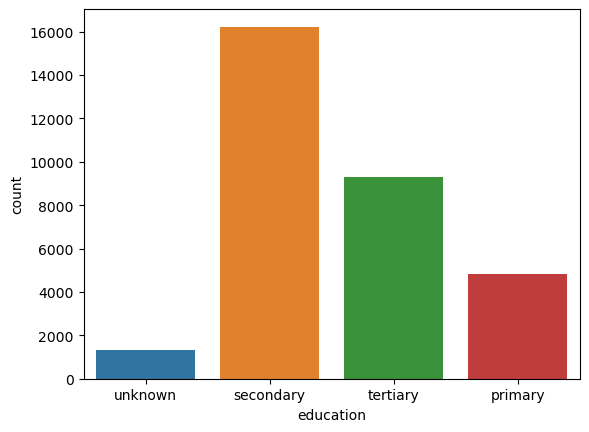

In [101]:
print(df["education"].value_counts())
ax=sns.countplot(x="education",data=df)
plt.show()

no     31062
yes      585
Name: default, dtype: int64


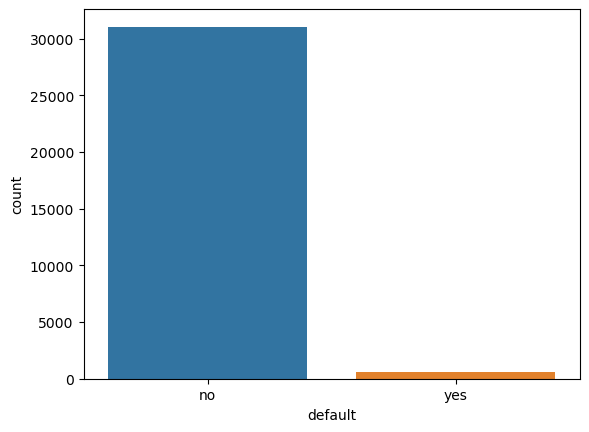

In [102]:
print(df["default"].value_counts())
ax=sns.countplot(x="default",data=df)
plt.show()

yes    17584
no     14063
Name: housing, dtype: int64


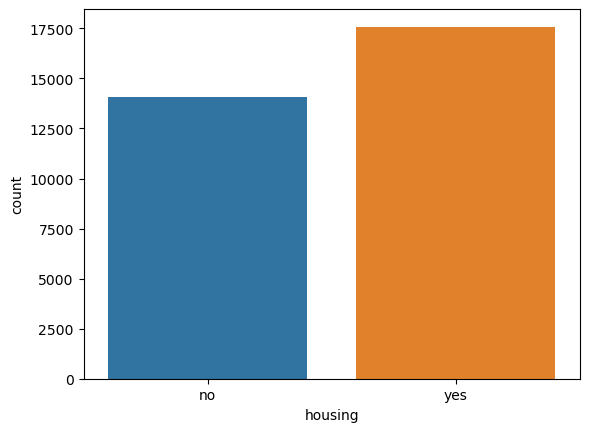

In [103]:
print(df["housing"].value_counts())
ax=sns.countplot(x="housing",data=df)
plt.show()

no     26516
yes     5131
Name: loan, dtype: int64


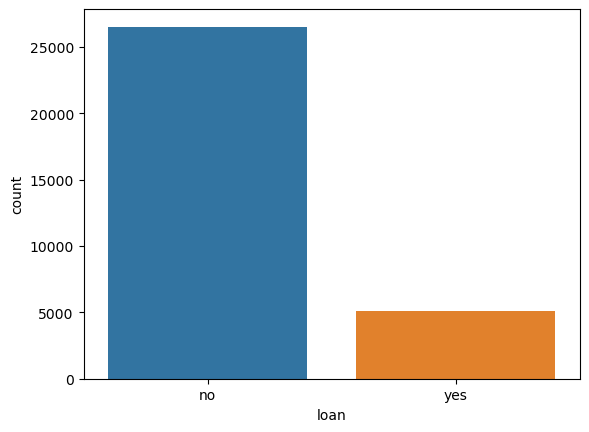

In [104]:
print(df["loan"].value_counts())
ax=sns.countplot(x="loan",data=df)
plt.show()

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


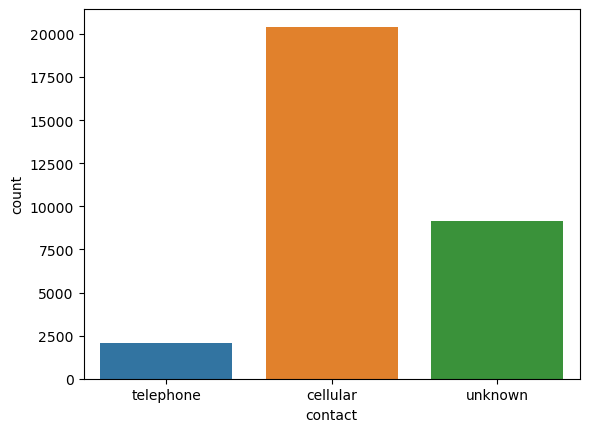

In [105]:
print(df["contact"].value_counts())
ax=sns.countplot(x="contact",data=df)
plt.show()

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


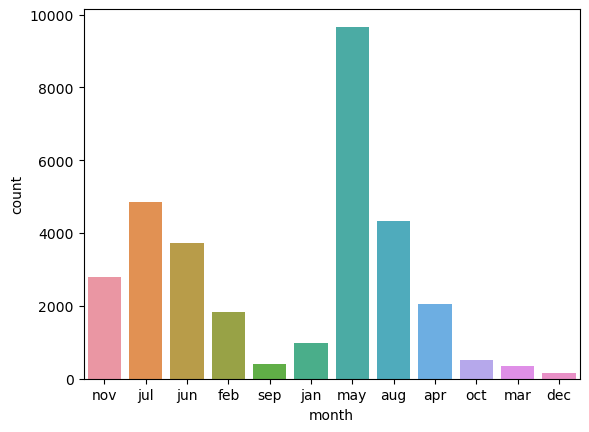

In [106]:
print(df["month"].value_counts())
ax=sns.countplot(x="month",data=df)
plt.show()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64


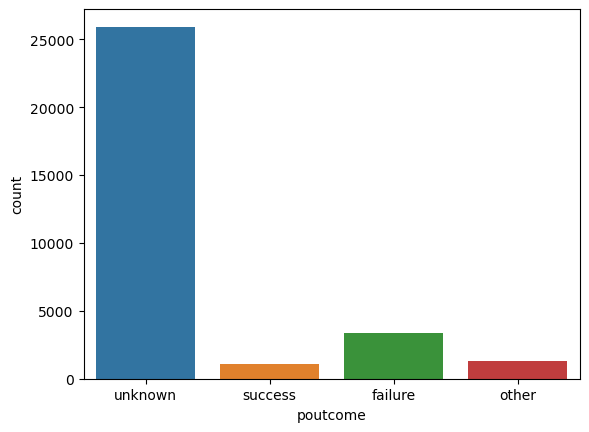

In [107]:
print(df["poutcome"].value_counts())
ax=sns.countplot(x="poutcome",data=df)
plt.show()

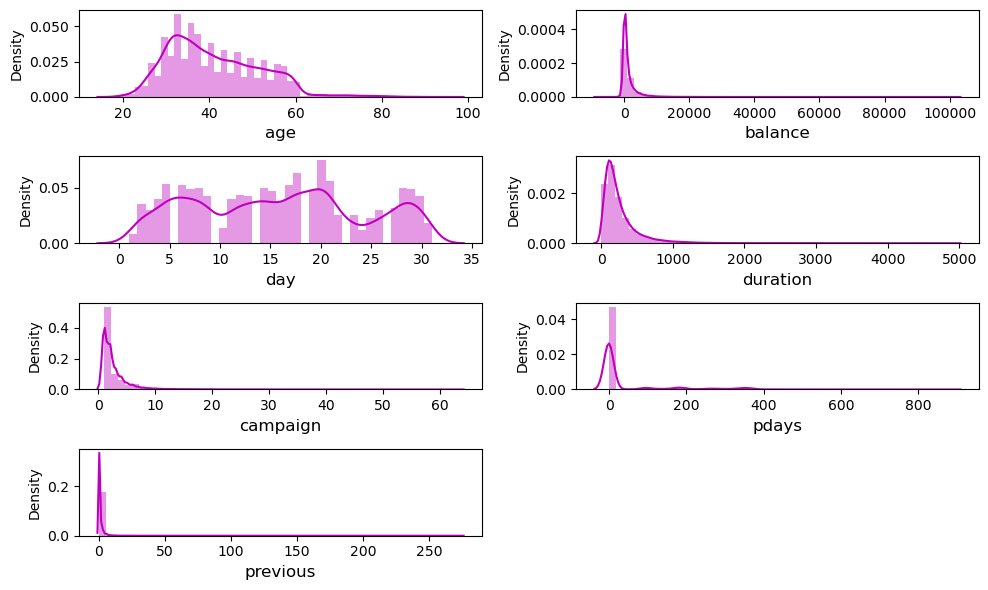

In [108]:
# lets check how data distributed to the remaining columns

plt.figure(figsize=(10,6), facecolor='white')
plotnumber =1
for col in numerical_col:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1 
plt.tight_layout()  

Here only day column is normally distributed rest all the columns skewed to right

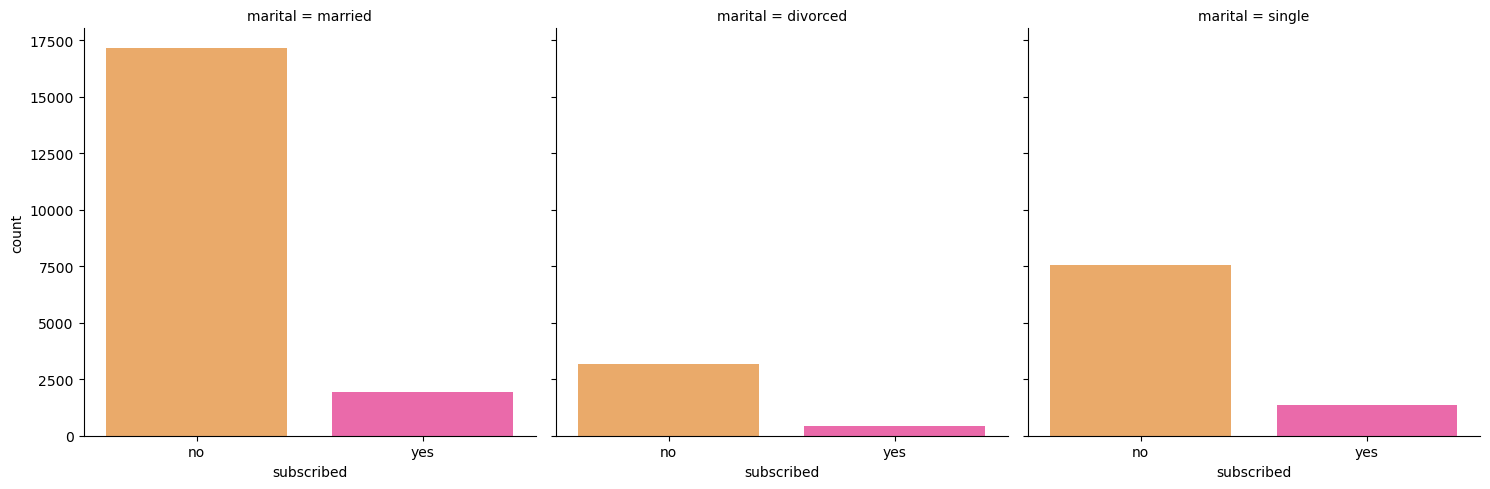

In [109]:
# checking the subscribed and marital
sns.catplot(x='subscribed',col="marital",data=df,kind="count",palette="spring_r")

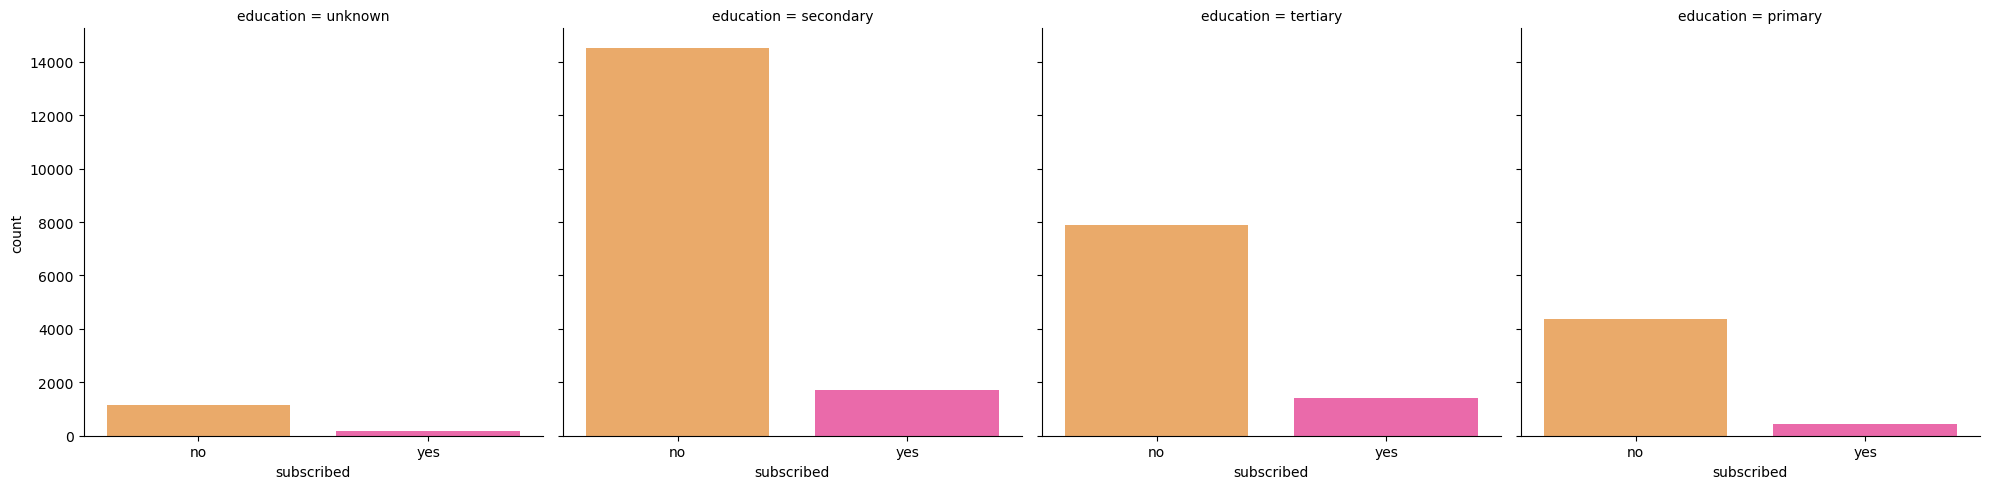

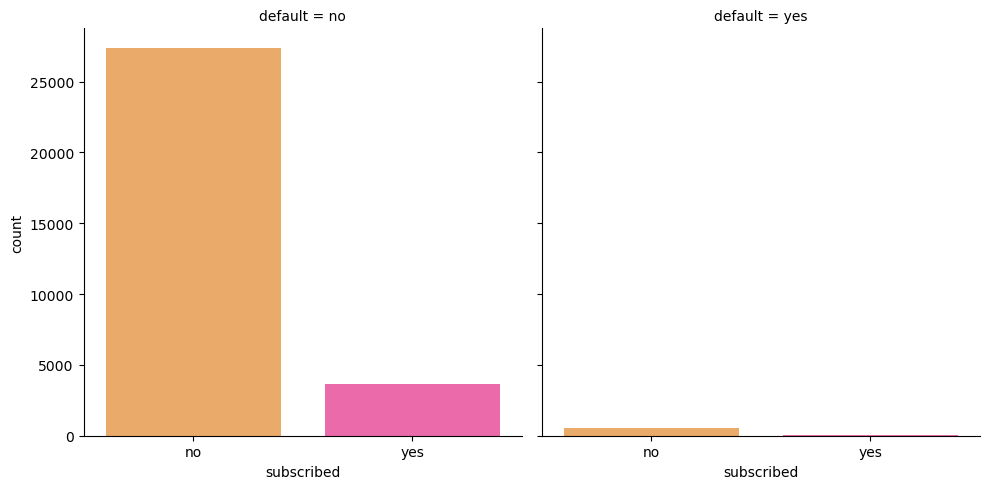

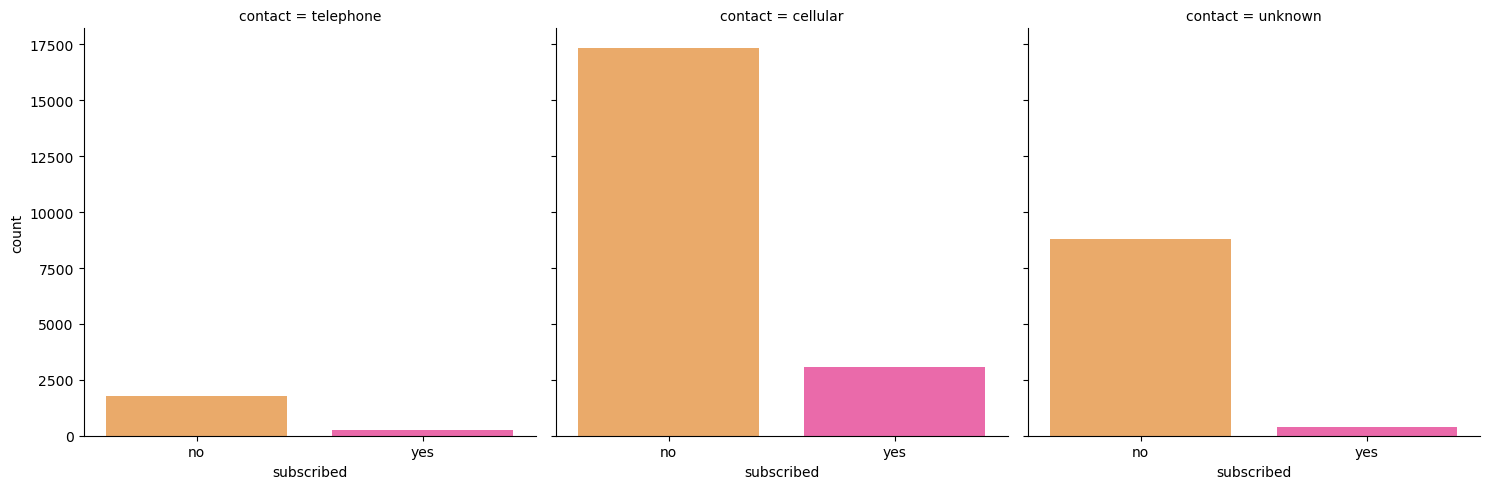

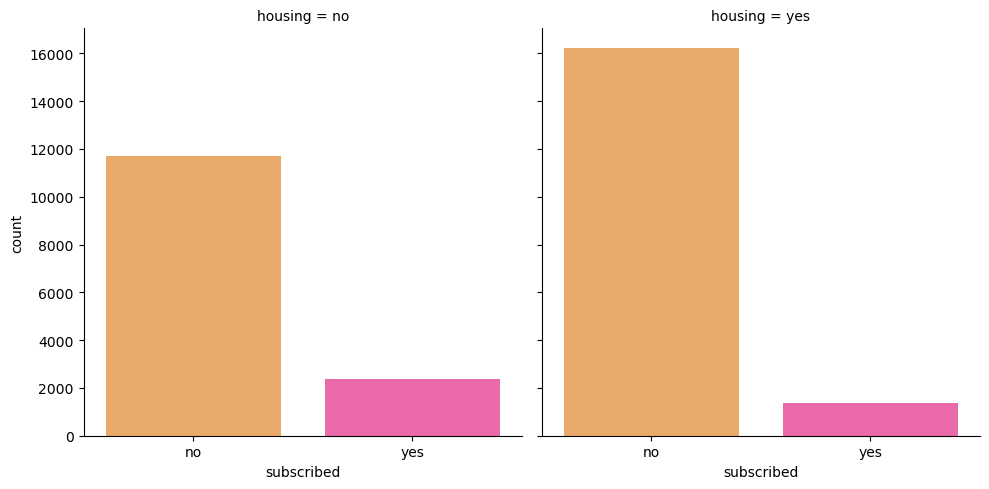

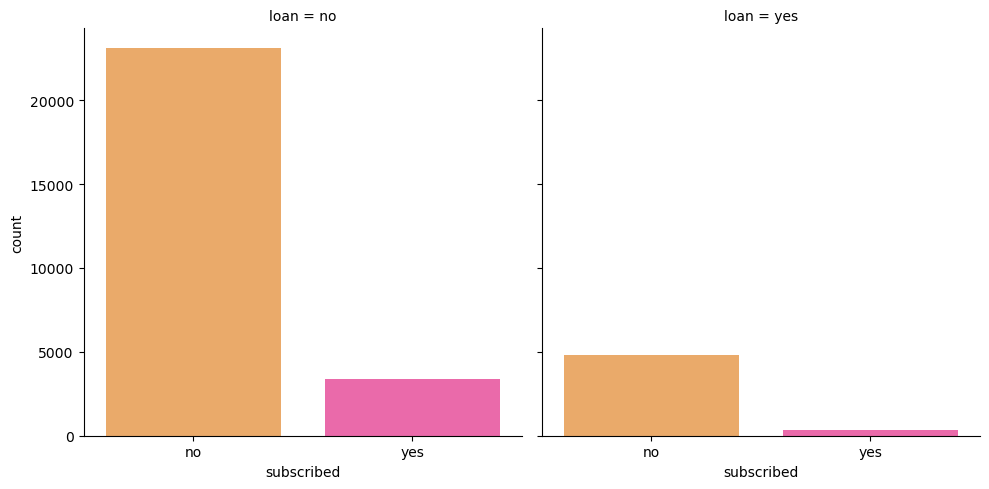

In [110]:
# checking the subscribed and education
sns.catplot(x='subscribed',col="education",data=df,kind="count",palette="spring_r")

# checking the subscribed and default
sns.catplot(x='subscribed',col="default",data=df,kind="count",palette="spring_r")

# checking the subscribed and contact
sns.catplot(x='subscribed',col="contact",data=df,kind="count",palette="spring_r")

# checking the subscribed and housing
sns.catplot(x='subscribed',col="housing",data=df,kind="count",palette="spring_r")

# checking the subscribed and loan
sns.catplot(x='subscribed',col="loan",data=df,kind="count",palette="spring_r")

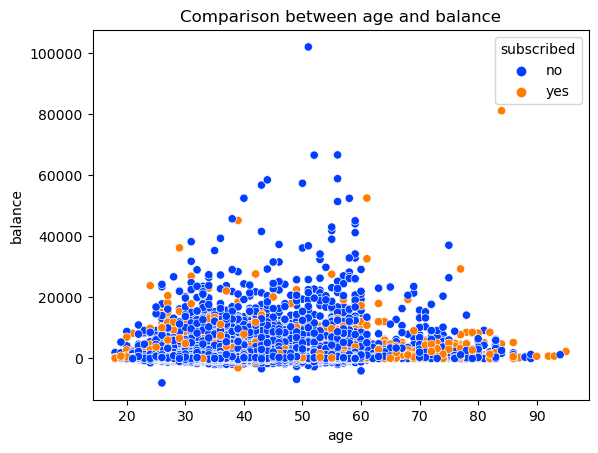

In [111]:
#comparing age and balance

plt.title("Comparison between age and balance")
sns.scatterplot(x="age",y="balance",data=df,hue="subscribed",palette="bright")
plt.show()

Here we cant found any relationship with the age and balance towards the subscrption

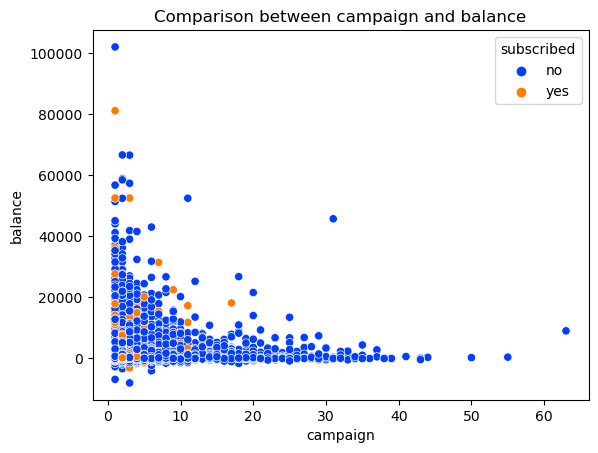

In [112]:
#comparing age and balance

plt.title("Comparison between campaign and balance")
sns.scatterplot(x="campaign",y="balance",data=df,hue="subscribed",palette="bright")
plt.show()

Here also we didnt found any relationship betweem campaign and relationship

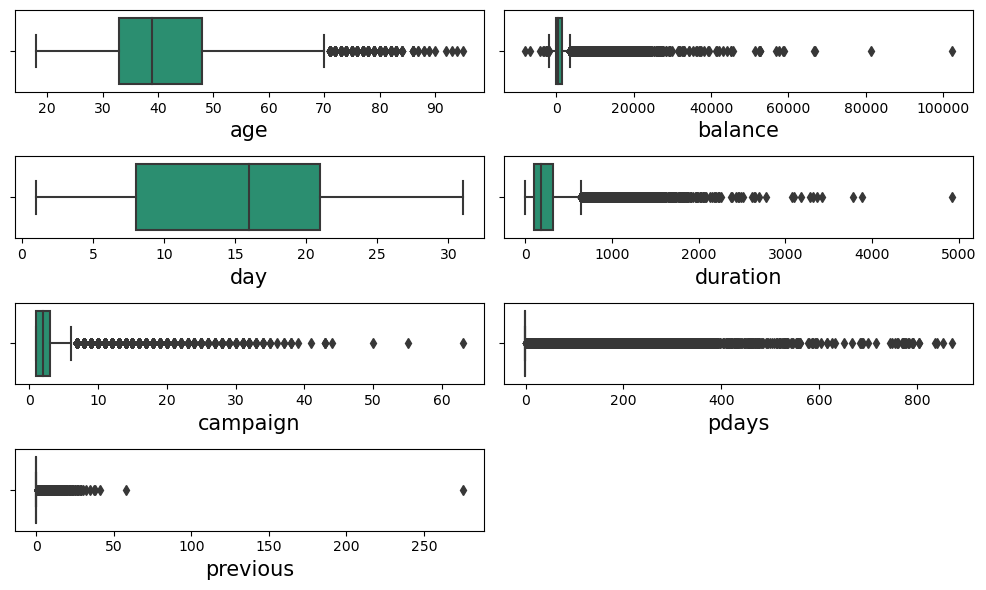

In [113]:
# lets check the outliers by using box plot

plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(df[col],palette="Dark2")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()  

Here we have outliers in all the columns except the day column

In [114]:
from scipy.stats import zscore
out_features=df[['age','balance','duration','campaign','pdays','previous']]
z=np.abs(zscore(out_features))
z       

,age,balance,duration,campaign,pdays,previous
0,1.415793,0.187933,0.832754,0.245906,0.408555,0.237059
1,0.937156,0.449397,0.649957,0.245906,0.408555,0.237059
2,1.313627,0.156159,0.070449,0.567059,0.408555,0.237059
3,1.509911,0.635055,2.368149,0.567059,0.447299,1.001336
4,0.937156,0.411091,0.474054,0.567059,0.408555,0.237059
...,...,...,...,...,...,...
31642,1.125392,0.450388,0.552724,0.245906,0.408555,0.237059
31643,1.133439,0.324903,0.699635,0.245906,0.408555,0.237059
31644,0.843038,0.347358,0.859979,0.075247,0.408555,0.237059
31645,1.509911,0.376088,0.918319,1.359859,2.994723,4.716521


In [115]:
# threshold = 3
np.where(z>3)

(array([   21,    26,    36, ..., 31622, 31645, 31646], dtype=int64),
 array([3, 1, 4, ..., 4, 5, 2], dtype=int64))

In [116]:
# now removing the data which is above zscore and creating new df

df1=df[(z<3).all(axis=1)]
df1.shape

(28124, 17)

In [117]:
print('Old Dataframe',df.shape)
print('New Dataframe',df1.shape)

Old Dataframe (31647, 17)
New Dataframe (28124, 17)


In [118]:
print('Data Loss percentage', ((df.shape[0]-df1.shape[0]))/df.shape[0]*100)

Data Loss percentage 11.132176825607482


Here the dataloss percentage is 11%

In [119]:
# now check with IQR method


#1st Quantile
Q1=out_features.quantile(0.25)

#3rd Quantile
Q3=out_features.quantile(0.75)


IQR=Q3-Q1

df2=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]

In [120]:
df2.shape

(19799, 17)

In [121]:
print('Data Loss percentage', ((df.shape[0]-df2.shape[0]))/df.shape[0]*100)

Data Loss percentage 37.437987802951305


By considering IQR data loss % is 37 percentage so we can go with z score

In [122]:
df1.shape

(28124, 17)

In [124]:
df=df1

In [125]:
df.shape

(28124, 17)

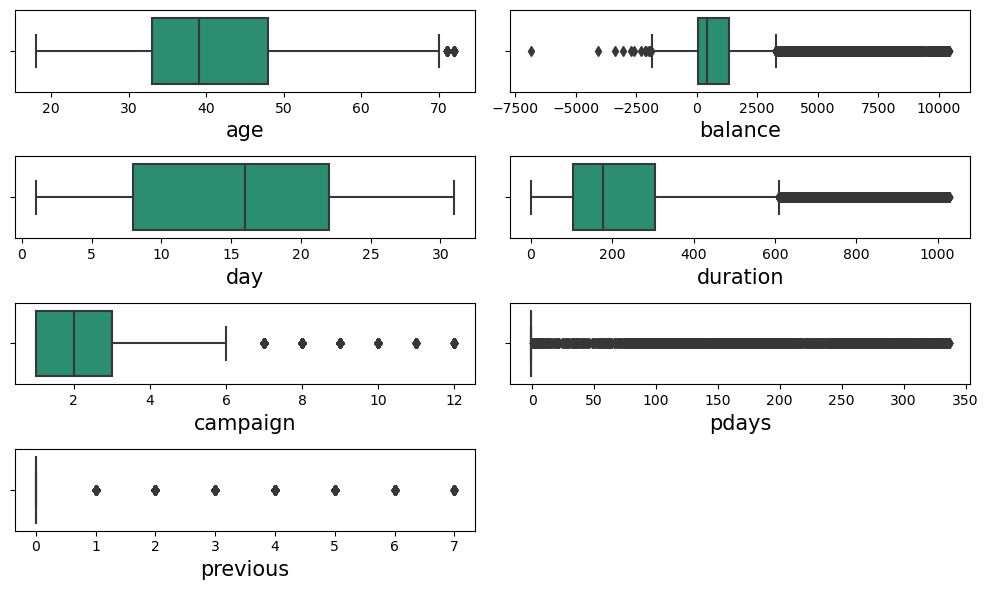

In [126]:
# lets check the outliers by using box plot

plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(df[col],palette="Dark2")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

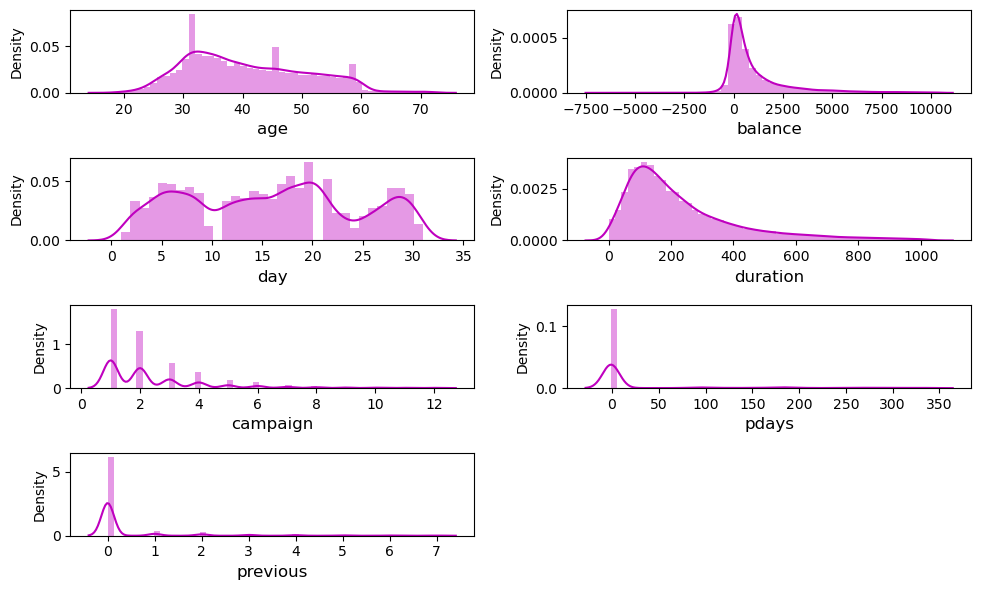

In [127]:
#lets check how data is distributed

plt.figure(figsize=(10,6), facecolor='white')
plotnumber =1
for col in numerical_col:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1 
plt.tight_layout()


Here age, day and duration distributed normally. balance have skewness of both left and right. campaign, pdays,previous have right skewness

In [128]:
df.skew()

age         0.438496
balance     2.437605
day         0.073752
duration    1.596552
campaign    2.059359
pdays       2.824483
previous    3.691573
dtype: float64

In [129]:
# removing skewness

df["balance"]=np.cbrt(df["balance"])

df["duration"]=np.cbrt(df["duration"])

df["campaign"]=np.cbrt(df["campaign"])

df["pdays"]=np.cbrt(df["pdays"])

df["previous"]=np.cbrt(df["previous"])


In [130]:
df.skew()

age         0.438496
balance    -0.435065
day         0.073752
duration    0.310493
campaign    0.997328
pdays       2.186152
previous    2.299676
dtype: float64

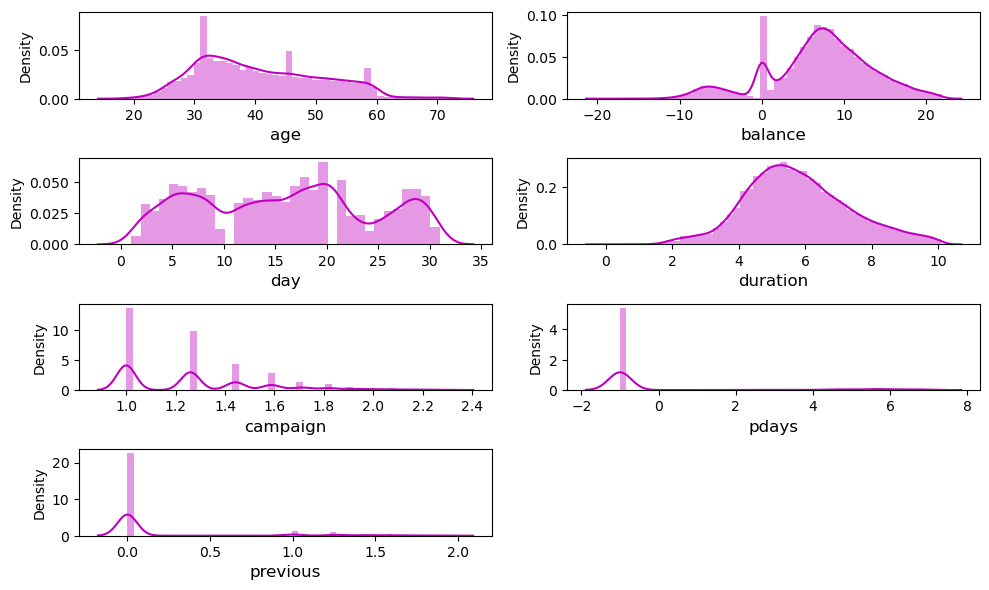

In [131]:
#lets check how data is distributed

plt.figure(figsize=(10,6), facecolor='white')
plotnumber =1
for col in numerical_col:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1 
plt.tight_layout()

In [132]:
# Encoding categorical columns using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
        
df   

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0.0,12.456918,0.0,0.0,1.0,19,9.0,3.530348,1.259921,-1.000000,0.00000,3.0,0.0
1,31,11.0,1.0,1.0,0.0,1.442250,0.0,0.0,0.0,20,5.0,4.497941,1.259921,-1.000000,0.00000,3.0,0.0
2,27,7.0,1.0,1.0,0.0,9.622603,1.0,0.0,0.0,18,5.0,6.214465,1.000000,-1.000000,0.00000,3.0,0.0
3,57,4.0,0.0,2.0,0.0,14.868480,0.0,0.0,0.0,22,6.0,9.535417,1.000000,4.379519,1.44225,2.0,1.0
4,31,9.0,1.0,1.0,0.0,4.918685,1.0,0.0,0.0,4,3.0,7.243156,1.000000,-1.000000,0.00000,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,4.0,2.0,1.0,0.0,14.371032,0.0,0.0,2.0,20,6.0,3.107233,1.587401,-1.000000,0.00000,3.0,0.0
31641,37,9.0,2.0,2.0,0.0,10.939057,0.0,0.0,2.0,6,6.0,7.617412,1.259921,-1.000000,0.00000,3.0,0.0
31642,29,4.0,2.0,2.0,0.0,0.000000,1.0,0.0,0.0,12,8.0,4.876999,1.259921,-1.000000,0.00000,3.0,0.0
31643,53,4.0,0.0,2.0,0.0,7.243156,0.0,1.0,0.0,5,6.0,7.594363,1.259921,-1.000000,0.00000,3.0,1.0


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28124 entries, 0 to 31644
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         28124 non-null  int64  
 1   job         28124 non-null  float64
 2   marital     28124 non-null  float64
 3   education   28124 non-null  float64
 4   default     28124 non-null  float64
 5   balance     28124 non-null  float64
 6   housing     28124 non-null  float64
 7   loan        28124 non-null  float64
 8   contact     28124 non-null  float64
 9   day         28124 non-null  int64  
 10  month       28124 non-null  float64
 11  duration    28124 non-null  float64
 12  campaign    28124 non-null  float64
 13  pdays       28124 non-null  float64
 14  previous    28124 non-null  float64
 15  poutcome    28124 non-null  float64
 16  subscribed  28124 non-null  float64
dtypes: float64(15), int64(2)
memory usage: 3.9 MB


Here we have all the columns having numerical data

In [135]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,28124.000000,28124.000000,28124.000000,28124.000000,28124.000000,28124.000000,28124.000000,28124.000000,28124.000000,28124.000000,28124.000000,28124.000000,28124.000000,28124.000000,28124.000000,28124.000000,28124.000000
mean,40.650192,4.346146,1.167722,1.225039,0.019201,7.141730,0.550633,0.166797,0.671455,15.855177,5.490755,5.772855,1.279601,-0.094533,0.180988,2.669855,0.101693
std,10.080098,3.288341,0.605709,0.746758,0.137232,6.195192,0.497439,0.372801,0.912957,8.392289,2.985288,1.561701,0.295419,2.280799,0.460735,0.874267,0.302249
min,18.000000,0.000000,0.000000,0.000000,0.000000,-18.988913,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,4.041240,0.000000,0.000000,0.000000,8.000000,3.000000,4.702669,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,7.547842,1.000000,0.000000,0.000000,16.000000,6.000000,5.625226,1.259921,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,11.049365,1.000000,0.000000,2.000000,22.000000,8.000000,6.738664,1.442250,-1.000000,0.000000,3.000000,0.000000
max,72.000000,11.000000,2.000000,3.000000,1.000000,21.857900,1.000000,1.000000,2.000000,31.000000,11.000000,10.095747,2.289428,6.958943,1.912931,3.000000,1.000000


Here al the columns have 0 null values and there is huge gap between 75th percentile and max in balance and pdays columns

In [136]:
#checking correlation

cor=df.corr()
cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.030552,-0.411087,-0.100363,-0.009616,0.079543,-0.155557,0.005488,0.029036,-0.009937,-0.042070,-0.031297,0.040856,-0.004609,0.001564,0.000751,-0.007172
job,-0.030552,1.000000,0.067076,0.169526,-0.007400,0.026094,-0.122764,-0.038629,-0.084375,0.020514,-0.088359,-0.003418,0.007853,0.012431,0.016147,-0.011441,0.036743
marital,-0.411087,0.067076,1.000000,0.109940,-0.012221,0.034716,-0.026593,-0.045159,-0.042070,-0.008386,-0.003321,0.016357,-0.030809,0.021377,0.023993,-0.015021,0.056387
education,-0.100363,0.169526,0.109940,1.000000,-0.007467,0.064140,-0.096581,-0.047982,-0.121975,0.017677,-0.056416,0.002066,-0.009684,0.048220,0.054828,-0.041203,0.075838
default,-0.009616,-0.007400,-0.012221,-0.007467,1.000000,-0.209161,-0.014763,0.081270,0.014592,0.007138,0.007290,-0.000054,0.012757,-0.038843,-0.040773,0.035944,-0.014500
balance,0.079543,0.026094,0.034716,0.064140,-0.209161,1.000000,-0.070652,-0.140556,-0.055374,-0.013262,-0.004558,0.024577,-0.023629,0.090450,0.094890,-0.082925,0.094746
housing,-0.155557,-0.122764,-0.026593,-0.096581,-0.014763,-0.070652,1.000000,0.031251,0.215776,-0.015138,0.274293,0.011891,-0.043774,0.033460,0.011504,-0.049579,-0.145640
loan,0.005488,-0.038629,-0.045159,-0.047982,0.081270,-0.140556,0.031251,1.000000,-0.012620,0.011949,0.026898,-0.006263,-0.001319,-0.014711,-0.018351,0.001714,-0.074803
contact,0.029036,-0.084375,-0.042070,-0.121975,0.014592,-0.055374,0.215776,-0.012620,1.000000,-0.030543,0.392662,-0.034850,-0.001789,-0.261336,-0.257049,0.248117,-0.158031
day,-0.009937,0.020514,-0.008386,0.017677,0.007138,-0.013262,-0.015138,0.011949,-0.030543,1.000000,0.017204,-0.039272,0.132730,-0.051627,-0.050992,0.045799,-0.030122


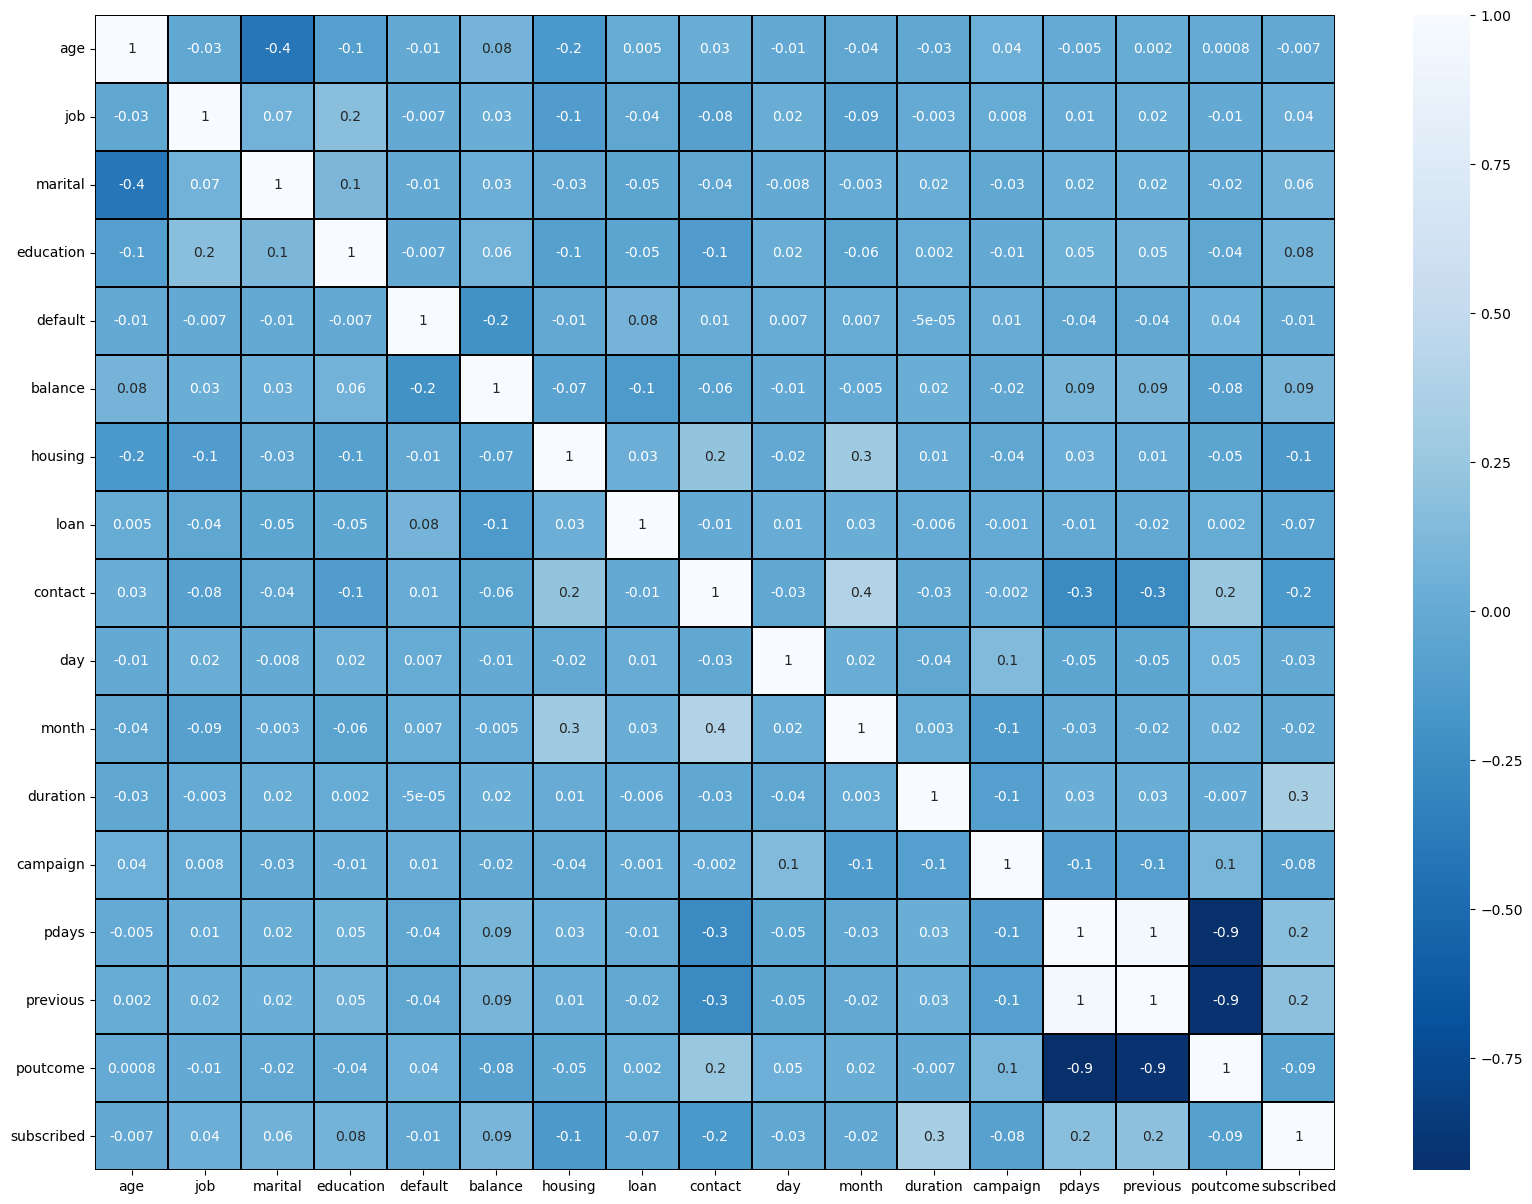

In [137]:
# visualize the correlation matrix using heat map

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1, fmt=".1g", linecolor="black", annot=True, cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

In [138]:
cor['subscribed'].sort_values(ascending=False)

subscribed    1.000000
duration      0.328075
previous      0.189480
pdays         0.167936
balance       0.094746
education     0.075838
marital       0.056387
job           0.036743
age          -0.007172
default      -0.014500
month        -0.022564
day          -0.030122
loan         -0.074803
campaign     -0.081699
poutcome     -0.091071
housing      -0.145640
contact      -0.158031
Name: subscribed, dtype: float64

here we found that none of the columns have strong relationship with the target variable

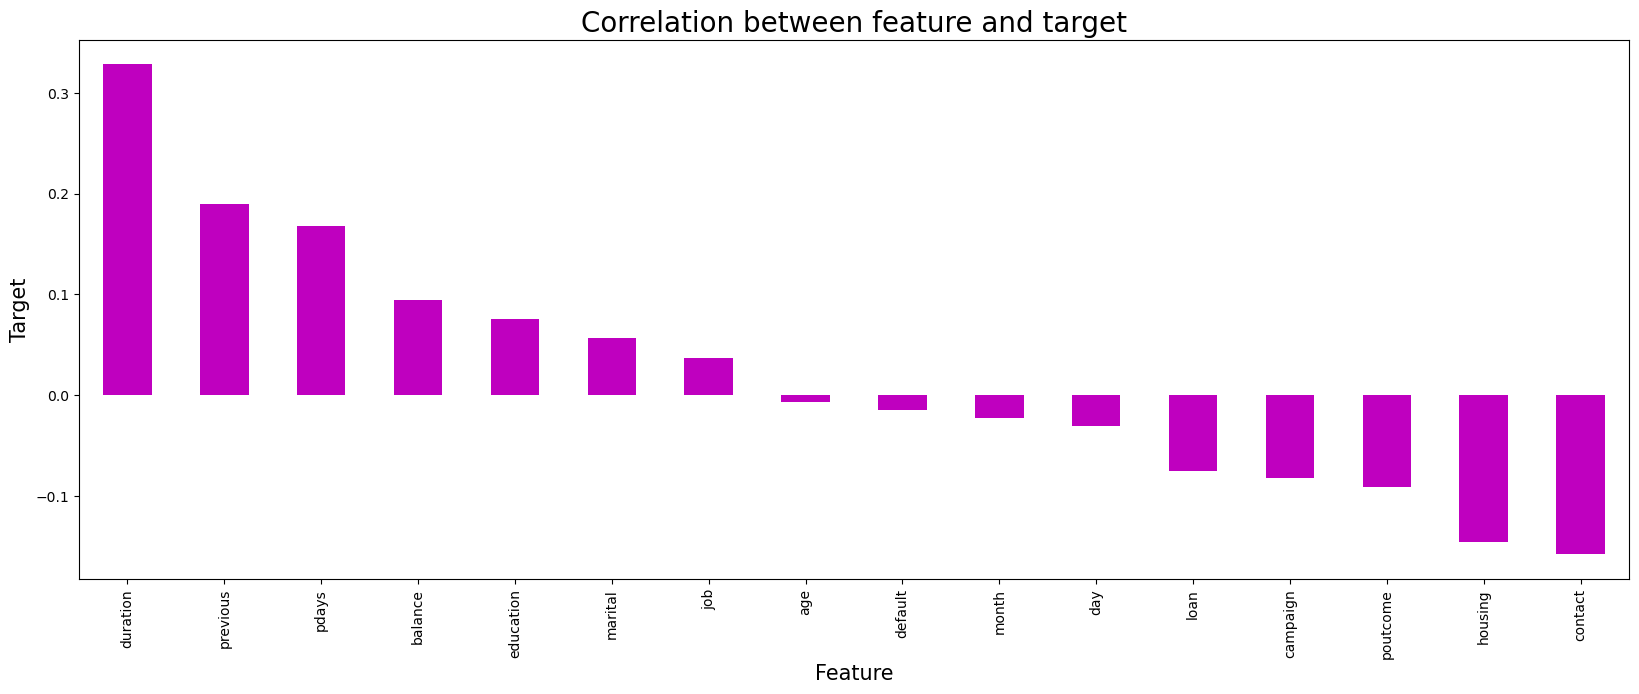

In [139]:
# visualizing the corelation between features and labels using bar plot

plt.figure(figsize=(20,7))
df.corr()['subscribed'].sort_values(ascending=False).drop(['subscribed']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title('Correlation between feature and target', fontsize=20)
plt.show()

In [140]:
x=df.drop("subscribed",axis=1)
y=df["subscribed"]

In [141]:
x.shape

(28124, 16)

In [142]:
y.shape

(28124,)

In [143]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.522811,-1.321707,-0.276906,2.376931,-0.139916,0.857969,-1.106956,-0.447423,0.359876,0.374734,1.175534,-1.435964,-0.066617,-0.397003,-0.392832,0.377632
1,-0.957368,2.023504,-0.276906,-0.301360,-0.139916,-0.920001,-1.106956,-0.447423,-0.735486,0.493893,-0.164394,-0.816377,-0.066617,-0.397003,-0.392832,0.377632
2,-1.354197,0.807064,-0.276906,-0.301360,-0.139916,0.400458,0.903378,-0.447423,-0.735486,0.255575,-0.164394,0.282780,-0.946471,-0.397003,-0.392832,0.377632
3,1.622018,-0.105266,-1.927894,1.037785,-0.139916,1.247239,-1.106956,-0.447423,-0.735486,0.732212,0.170588,2.409314,-0.946471,1.961651,2.737549,-0.766204
4,-0.957368,1.415284,-0.276906,-0.301360,-0.139916,-0.358840,0.903378,-0.447423,-0.735486,-1.412653,-0.834358,0.941491,-0.946471,-0.397003,-0.392832,0.377632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,0.233118,-0.105266,1.374081,-0.301360,-0.139916,1.166942,-1.106956,-0.447423,1.455237,0.493893,0.170588,-1.706902,1.041930,-0.397003,-0.392832,0.377632
28120,-0.362125,1.415284,1.374081,1.037785,-0.139916,0.612958,-1.106956,-0.447423,1.455237,-1.174334,0.170588,1.181141,-0.066617,-0.397003,-0.392832,0.377632
28121,-1.155782,-0.105266,1.374081,1.037785,-0.139916,-1.152806,0.903378,-0.447423,-0.735486,-0.459380,0.840552,-0.573652,-0.066617,-0.397003,-0.392832,0.377632
28122,1.225189,-0.105266,-1.927894,1.037785,-0.139916,0.016372,-1.106956,2.235019,-0.735486,-1.293493,0.170588,1.166382,-0.066617,-0.397003,-0.392832,0.377632


In [144]:
# checking variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF Values,Features
0,1.271716,age
1,1.049288,job
2,1.230012,marital
3,1.066624,education
4,1.050655,default
5,1.091450,balance
6,1.176599,housing
7,1.030703,loan
8,1.329466,contact
9,1.026433,day


Here pdays and previous having the strong multicolinearity issue so we are drooping the pdays column as it has high multicoliearity issue

In [145]:
x.drop('pdays',axis=1,inplace=True)
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,1.522811,-1.321707,-0.276906,2.376931,-0.139916,0.857969,-1.106956,-0.447423,0.359876,0.374734,1.175534,-1.435964,-0.066617,-0.392832,0.377632
1,-0.957368,2.023504,-0.276906,-0.301360,-0.139916,-0.920001,-1.106956,-0.447423,-0.735486,0.493893,-0.164394,-0.816377,-0.066617,-0.392832,0.377632
2,-1.354197,0.807064,-0.276906,-0.301360,-0.139916,0.400458,0.903378,-0.447423,-0.735486,0.255575,-0.164394,0.282780,-0.946471,-0.392832,0.377632
3,1.622018,-0.105266,-1.927894,1.037785,-0.139916,1.247239,-1.106956,-0.447423,-0.735486,0.732212,0.170588,2.409314,-0.946471,2.737549,-0.766204
4,-0.957368,1.415284,-0.276906,-0.301360,-0.139916,-0.358840,0.903378,-0.447423,-0.735486,-1.412653,-0.834358,0.941491,-0.946471,-0.392832,0.377632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,0.233118,-0.105266,1.374081,-0.301360,-0.139916,1.166942,-1.106956,-0.447423,1.455237,0.493893,0.170588,-1.706902,1.041930,-0.392832,0.377632
28120,-0.362125,1.415284,1.374081,1.037785,-0.139916,0.612958,-1.106956,-0.447423,1.455237,-1.174334,0.170588,1.181141,-0.066617,-0.392832,0.377632
28121,-1.155782,-0.105266,1.374081,1.037785,-0.139916,-1.152806,0.903378,-0.447423,-0.735486,-0.459380,0.840552,-0.573652,-0.066617,-0.392832,0.377632
28122,1.225189,-0.105266,-1.927894,1.037785,-0.139916,0.016372,-1.106956,2.235019,-0.735486,-1.293493,0.170588,1.166382,-0.066617,-0.392832,0.377632


In [146]:
# again checking variance inflation factor

vif=pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF Values,Features
0,1.271433,age
1,1.049220,job
2,1.229999,marital
3,1.066573,education
4,1.050649,default
5,1.091419,balance
6,1.174162,housing
7,1.030546,loan
8,1.328295,contact
9,1.026378,day


Here we overcome with the multicolinearity issue

In [147]:
y.value_counts()

0.0    25264
1.0     2860
Name: subscribed, dtype: int64

Here target variable data is not balanced so we will use oversampling method 

In [148]:
#oversampling the data

!pip install imblearn
from imblearn.over_sampling import SMOTE
sm= SMOTE()
x1,y1=sm.fit_resample(x,y)

Defaulting to user installation because normal site-packages is not writeable


In [151]:
y1.value_counts()

0.0    25264
1.0    25264
Name: subscribed, dtype: int64

In [152]:
#finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxACCU=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACCU:
        maxACCU=acc
        maxRS=1
print("best accuracy is:", maxACCU,  "at random state:",maxRS) 

best accuracy is: 0.9584405303779933 at random state: 1


In [154]:
# creating train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

Classification algorithms

In [155]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [156]:
#checking accuracy score for randomforestclassifier

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9064944299597061
[[7420  148]
 [ 641  229]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7568
         1.0       0.61      0.26      0.37       870

    accuracy                           0.91      8438
   macro avg       0.76      0.62      0.66      8438
weighted avg       0.89      0.91      0.89      8438



In [157]:
#checking accuracy score for Logistic Regression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.9037686655605593
[[7401  167]
 [ 645  225]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7568
         1.0       0.57      0.26      0.36       870

    accuracy                           0.90      8438
   macro avg       0.75      0.62      0.65      8438
weighted avg       0.88      0.90      0.89      8438



In [158]:
#checking accuracy score for support vector machine

svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9057833609860156
[[7503   65]
 [ 730  140]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      7568
         1.0       0.68      0.16      0.26       870

    accuracy                           0.91      8438
   macro avg       0.80      0.58      0.61      8438
weighted avg       0.89      0.91      0.88      8438



In [159]:
#checking accuracy score for GradientBoostingClassifier

GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.9085091253851624
[[7401  167]
 [ 605  265]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7568
         1.0       0.61      0.30      0.41       870

    accuracy                           0.91      8438
   macro avg       0.77      0.64      0.68      8438
weighted avg       0.89      0.91      0.89      8438



In [160]:
#checking accuracy score for AdaBoostClassifier

AB=AdaBoostClassifier()
AB.fit(x_train,y_train)
predAB=AB.predict(x_test)
print(accuracy_score(y_test,predAB))
print(confusion_matrix(y_test,predAB))
print(classification_report(y_test,predAB))

0.9018724816307182
[[7366  202]
 [ 626  244]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      7568
         1.0       0.55      0.28      0.37       870

    accuracy                           0.90      8438
   macro avg       0.73      0.63      0.66      8438
weighted avg       0.88      0.90      0.89      8438



In [161]:
#checking accuracy score for ExtraTreesClassifier

ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9045982460298649
[[7440  128]
 [ 677  193]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7568
         1.0       0.60      0.22      0.32       870

    accuracy                           0.90      8438
   macro avg       0.76      0.60      0.64      8438
weighted avg       0.88      0.90      0.88      8438



In [162]:
#cross validation

from sklearn.model_selection import cross_val_score

In [168]:
# checking cv score for RandomForestClassifier

score = cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(y_test,predRFC) - score.mean())*100)

[0.91203246 0.96200277 0.9643776  0.96714498 0.96259278]
0.953630115530449
Difference between accuracy score and cross val score is - -4.713568557074288


In [169]:
# checking cv score for Logistic Regression

score2 = cross_val_score(LR,x1,y1)
print(score2)
print(score2.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(y_test,predLR) - score2.mean())*100)

[0.81268553 0.81852365 0.8182268  0.82365166 0.81523998]
0.8176655232859252
Difference between accuracy score and cross val score is - 8.610314227463412


In [170]:
# checking cv score for GradientBoostingClassifier

score3 = cross_val_score(GB,x1,y1)
print(score3)
print(score3.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(y_test,predGB) - score3.mean())*100)

[0.84909954 0.91925589 0.92568771 0.93151905 0.92439386]
0.909991211417265
Difference between accuracy score and cross val score is - -0.14820860321026474


In [172]:
# checking cv score for AdaBoost classifier

score5 = cross_val_score(AB,x1,y1)
print(score5)
print(score5.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(y_test,predAB) - score5.mean())*100)

[0.81703938 0.88798733 0.89036216 0.89539832 0.88520534]
0.8751985078896013
Difference between accuracy score and cross val score is - 2.6673973741116908


In [173]:
# checking cv score for Extratreesclassifier

score6 = cross_val_score(ET,x1,y1)
print(score6)
print(score6.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(y_test,predET) - score6.mean())*100)

[0.96180487 0.96843459 0.96972096 0.97041069 0.96932212]
0.9679386450189102
Difference between accuracy score and cross val score is - -6.334039898904531


Here ExtratreesClassifier is our best model as difference bteen CV and accuracy score is least.

In [176]:
# ExtraTreesClassifier

from sklearn.model_selection import GridSearchCV

parameters= [{'max_depth': list(range(5, 8)), 'max_features': list(range(0,10))}]

In [177]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [178]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid=[{'max_depth': [5, 6, 7],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}])

In [179]:
GCV.best_params_

{'max_depth': 7, 'max_features': 8}

In [180]:
final_model=ExtraTreesClassifier(max_depth=7,max_features=8)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.61388954728609


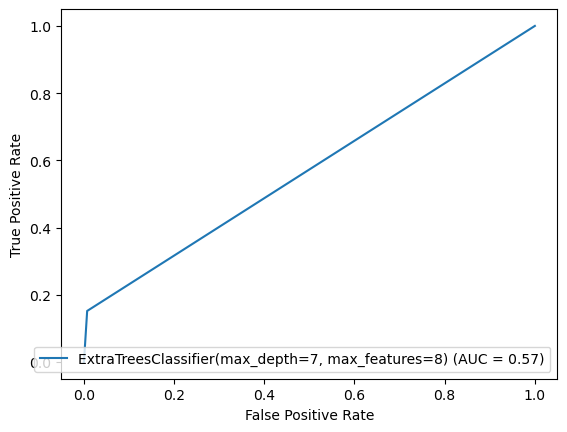

In [181]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

In [182]:
# saving model using .pkl

import joblib
joblib.dump(final_model,'Bank Marketing subscription prediction.pkl')

['Bank Marketing subscription prediction.pkl']

In [183]:
#lets load the saved model and get the predictions

model=joblib.load('Bank Marketing subscription prediction.pkl')

#prediction
prediction=model.predict(x_test)
prediction

array([0., 0., 0., ..., 0., 1., 0.])

In [184]:
a=np.array(y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df

,Predicted,Original
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
8433,0.0,0.0
8434,0.0,0.0
8435,0.0,0.0
8436,1.0,1.0


In [185]:
df1=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')

In [186]:
df1.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [194]:
df1.drop('ID',axis=1,inplace=True)

In [195]:
df1.shape

(13564, 16)

In [196]:
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

Here we have no null values in any of the column

In [197]:
df1.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [198]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        13564 non-null  int64 
 1   job        13564 non-null  object
 2   marital    13564 non-null  object
 3   education  13564 non-null  object
 4   default    13564 non-null  object
 5   balance    13564 non-null  int64 
 6   housing    13564 non-null  object
 7   loan       13564 non-null  object
 8   contact    13564 non-null  object
 9   day        13564 non-null  int64 
 10  month      13564 non-null  object
 11  duration   13564 non-null  int64 
 12  campaign   13564 non-null  int64 
 13  pdays      13564 non-null  int64 
 14  previous   13564 non-null  int64 
 15  poutcome   13564 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.7+ MB


In [200]:
# check the unique values count of each columns

for i in df1.columns:
    print(df1[i].value_counts())
    print("\n")

32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: age, Length: 75, dtype: int64


blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64


married     8119
single      3868
divorced    1577
Name: marital, dtype: int64


secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64


no     13334
yes      230
Name: default, dtype: int64


 0       1044
 1         58
 2         47
 3         46
 4         44
         ... 
-140        1
 6495       1
 8180       1
 3684       1
 4256       1
Name: balance, Length: 4292, dtype: int64


yes    7546
no     6018
Name: housing, dtype: int64


no     11451
yes     2113
Name: loan, dtype: int64


cellular     886

In [201]:
# separating Numerical and categorical columns

#checking for categorical columns
categorical_col=[]
for i in df1.dtypes.index:
    if df1.dtypes[i]=="object":
        categorical_col.append(i)
print('Categorical columns    :',categorical_col)
print("\n")

#checking for Numerical columns
numerical_col=[]
for i in df1.dtypes.index:
    if df1.dtypes[i]!="object":
        numerical_col.append(i)
print('Numerical columns    :',numerical_col)  

Categorical columns    : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


Numerical columns    : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


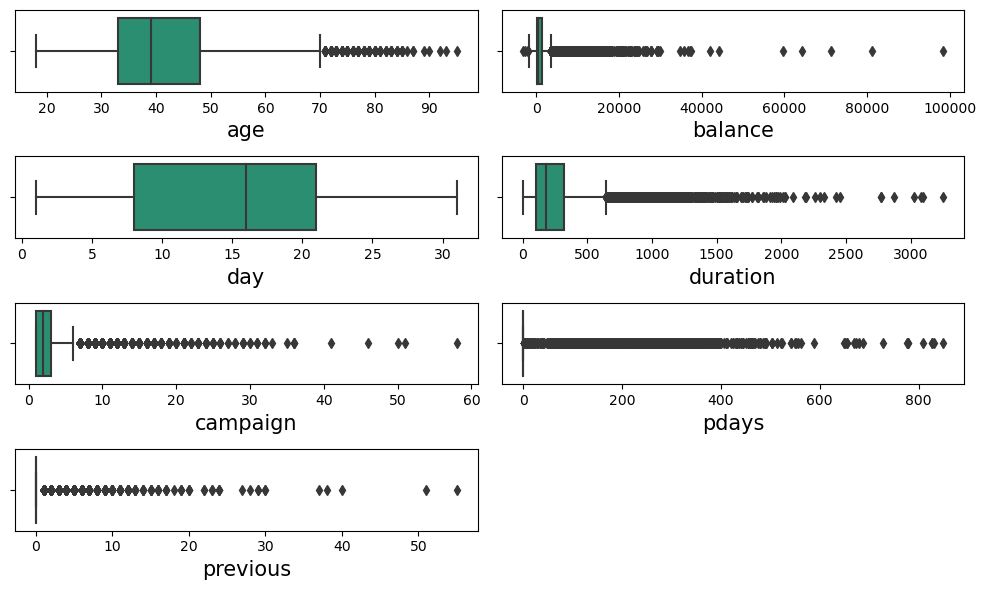

In [204]:
# lets check the outliers by using box plot

plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(df1[col],palette="Dark2")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout() 

In [206]:
from scipy.stats import zscore
out_features=df1[['age','balance','duration','campaign','pdays','previous']]
z=np.abs(zscore(out_features))
z       

,age,balance,duration,campaign,pdays,previous
0,0.838114,0.402389,0.921849,1.058702,0.418199,0.297500
1,3.499987,0.463375,0.439963,0.574850,0.418199,0.297500
2,0.932421,0.393955,1.616074,0.574850,0.418199,0.297500
3,1.519549,0.784508,0.747754,0.248140,0.418199,0.297500
4,0.387871,0.669352,0.569789,0.574850,0.418199,0.297500
...,...,...,...,...,...,...
13559,0.177969,0.426069,0.426644,0.405281,0.418199,0.297500
13560,1.236630,0.299239,0.387957,0.574850,0.418199,0.297500
13561,0.555195,0.348218,0.473070,0.574850,0.418199,0.297500
13562,1.121034,0.290155,0.194517,0.248140,0.483926,1.203911


In [207]:
# threshold = 3
np.where(z>3)

(array([    1,     9,    14, ..., 13550, 13555, 13563], dtype=int64),
 array([0, 4, 1, ..., 2, 3, 4], dtype=int64))

In [216]:
Df3=df1[(z<3).all(axis=1)]
Df3.shape

(12034, 16)

In [219]:
Df3.shape

(12034, 16)

In [220]:
print('Data Loss percentage', ((df1.shape[0]-Df3.shape[0]))/df1.shape[0]*100)

Data Loss percentage 11.279858448835151


In [222]:
df1=Df3

In [223]:
df1.shape

(12034, 16)

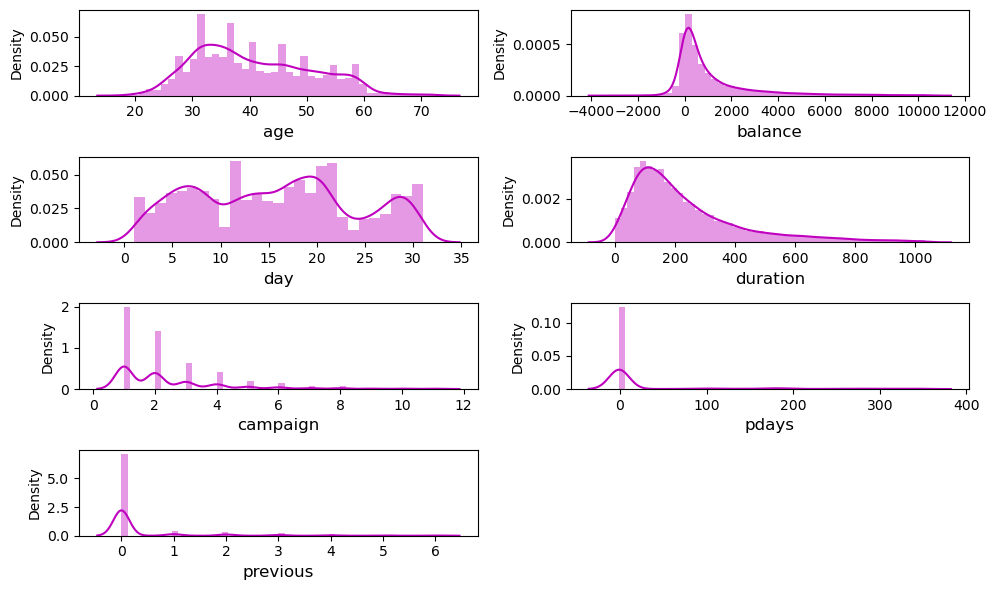

In [224]:
#lets check how data is distributed

plt.figure(figsize=(10,6), facecolor='white')
plotnumber =1
for col in numerical_col:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(df1[col],color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1 
plt.tight_layout()


In [226]:
df1.skew()

age         0.435270
balance     2.476671
day         0.100926
duration    1.578135
campaign    1.958366
pdays       2.728161
previous    3.398894
dtype: float64

In [229]:
# removing skewness

df1["balance"]=np.cbrt(df1["balance"])

df1["duration"]=np.cbrt(df1["duration"])

df1["campaign"]=np.cbrt(df1["campaign"])

df1["pdays"]=np.cbrt(df1["pdays"])

df1["previous"]=np.cbrt(df1["previous"])

In [230]:
df1.skew()

age         0.435270
balance    -0.412190
day         0.100926
duration    0.290029
campaign    0.961277
pdays       2.106077
previous    2.198396
dtype: float64

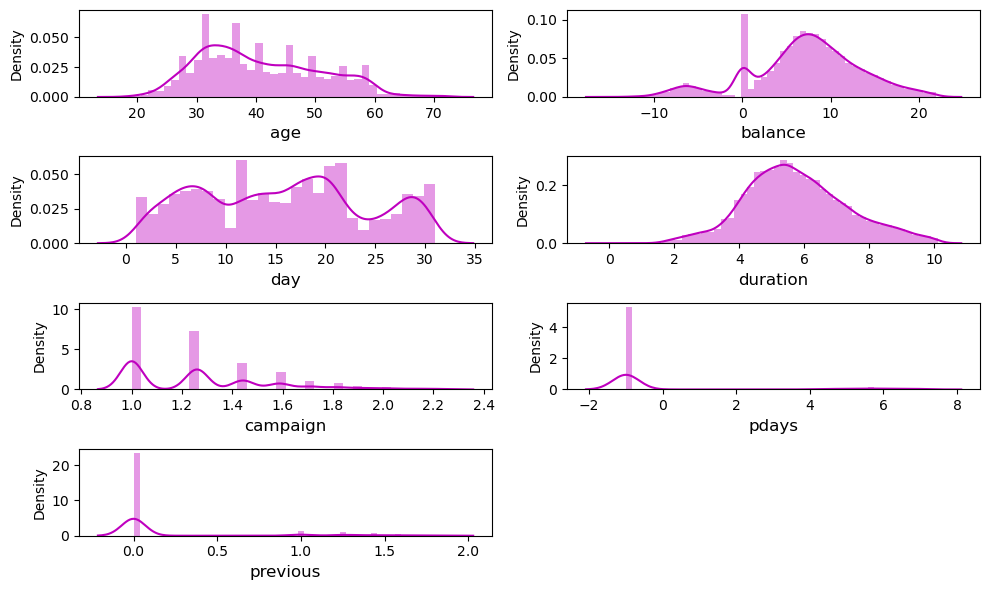

In [231]:
#lets check how data is distributed

plt.figure(figsize=(10,6), facecolor='white')
plotnumber =1
for col in numerical_col:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(df1[col],color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1 
plt.tight_layout()

In [232]:
# Encoding categorical columns using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtypes=="object":
        df1[i]=OE.fit_transform(df1[i].values.reshape(-1,1))
        
df1


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7.0,1.0,1.0,0.0,4.904868,1.0,0.0,0.0,15,8.0,2.714418,1.817121,-1.000000,0.00000,3.0
2,31,6.0,2.0,2.0,0.0,5.241483,1.0,0.0,2.0,16,8.0,8.776383,1.000000,-1.000000,0.00000,3.0
3,57,7.0,2.0,0.0,0.0,15.573360,1.0,0.0,1.0,13,8.0,4.020726,1.259921,-1.000000,0.00000,3.0
4,45,1.0,0.0,1.0,0.0,-8.900130,0.0,1.0,2.0,3,5.0,4.805896,1.000000,-1.000000,0.00000,3.0
5,32,4.0,2.0,2.0,0.0,0.000000,1.0,0.0,0.0,22,5.0,7.691372,1.259921,-1.000000,0.00000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13558,32,9.0,2.0,1.0,0.0,5.052774,1.0,0.0,0.0,7,8.0,5.972093,1.000000,-1.000000,0.00000,3.0
13559,39,4.0,1.0,2.0,0.0,3.556893,0.0,0.0,0.0,28,1.0,5.289572,1.587401,-1.000000,0.00000,3.0
13560,54,1.0,1.0,0.0,0.0,13.163613,1.0,0.0,2.0,20,6.0,5.406120,1.000000,-1.000000,0.00000,3.0
13561,35,5.0,1.0,0.0,0.0,6.580844,1.0,0.0,0.0,29,4.0,5.142563,1.000000,-1.000000,0.00000,3.0


In [234]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12034 entries, 0 to 13562
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        12034 non-null  int64  
 1   job        12034 non-null  float64
 2   marital    12034 non-null  float64
 3   education  12034 non-null  float64
 4   default    12034 non-null  float64
 5   balance    12034 non-null  float64
 6   housing    12034 non-null  float64
 7   loan       12034 non-null  float64
 8   contact    12034 non-null  float64
 9   day        12034 non-null  int64  
 10  month      12034 non-null  float64
 11  duration   12034 non-null  float64
 12  campaign   12034 non-null  float64
 13  pdays      12034 non-null  float64
 14  previous   12034 non-null  float64
 15  poutcome   12034 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.6 MB


In [236]:
df1.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.00000,12034.000000,12034.000000,12034.00000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000
mean,40.669603,4.362390,1.166528,1.221290,0.017700,7.144748,0.553681,0.15988,0.659880,15.708160,5.46834,5.767126,1.278204,-0.032860,0.187821,2.646086
std,10.113132,3.285529,0.609236,0.741483,0.131864,6.182241,0.497131,0.36651,0.910108,8.288185,2.99092,1.573590,0.292895,2.370704,0.464400,0.906759
min,18.000000,0.000000,0.000000,0.000000,0.000000,-14.907580,0.000000,0.00000,0.000000,1.000000,0.00000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,4.020726,0.000000,0.00000,0.000000,8.000000,3.00000,4.687548,1.000000,-1.000000,0.000000,3.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,7.518473,1.000000,0.00000,0.000000,16.000000,6.00000,5.614672,1.259921,-1.000000,0.000000,3.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,11.005507,1.000000,0.00000,2.000000,21.000000,8.00000,6.744164,1.442250,-1.000000,0.000000,3.000000
max,72.000000,11.000000,2.000000,3.000000,1.000000,21.964129,1.000000,1.00000,2.000000,31.000000,11.00000,10.105549,2.223980,7.027106,1.817121,3.000000


In [237]:
#checking correlation

cor=df1.corr()
cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
age,1.000000,-0.024909,-0.401340,-0.114052,-0.022287,0.093053,-0.170647,-0.004693,0.026597,-0.010947,-0.051793,-0.019316,0.040476,-0.004184,0.003303,0.004149
job,-0.024909,1.000000,0.047944,0.153302,-0.014423,0.021014,-0.122754,-0.022032,-0.092125,0.021011,-0.097487,0.008474,0.021149,0.002096,0.010892,0.002941
marital,-0.401340,0.047944,1.000000,0.110662,0.001582,0.028479,-0.014701,-0.060814,-0.038729,0.004194,-0.016489,0.004205,-0.026306,0.014518,0.012936,-0.009290
education,-0.114052,0.153302,0.110662,1.000000,-0.020514,0.051363,-0.081490,-0.057723,-0.113206,0.033944,-0.058690,-0.004374,0.010517,0.029478,0.037524,-0.028494
default,-0.022287,-0.014423,0.001582,-0.020514,1.000000,-0.193733,0.007690,0.063530,0.021775,0.005107,0.033134,-0.005381,0.016811,-0.036671,-0.035800,0.033629
balance,0.093053,0.021014,0.028479,0.051363,-0.193733,1.000000,-0.081891,-0.146584,-0.045071,-0.008483,-0.004216,0.031503,-0.024192,0.078874,0.086454,-0.074608
housing,-0.170647,-0.122754,-0.014701,-0.081490,0.007690,-0.081891,1.000000,0.050499,0.189414,-0.021067,0.276915,0.007858,-0.042159,0.074908,0.049388,-0.087178
loan,-0.004693,-0.022032,-0.060814,-0.057723,0.063530,-0.146584,0.050499,1.000000,-0.017592,0.001628,0.021297,-0.013478,-0.006442,-0.025957,-0.029091,0.017237
contact,0.026597,-0.092125,-0.038729,-0.113206,0.021775,-0.045071,0.189414,-0.017592,1.000000,-0.031019,0.385196,-0.053480,-0.007071,-0.265581,-0.262427,0.254620
day,-0.010947,0.021011,0.004194,0.033944,0.005107,-0.008483,-0.021067,0.001628,-0.031019,1.000000,0.000566,-0.026590,0.129826,-0.079531,-0.075353,0.071888


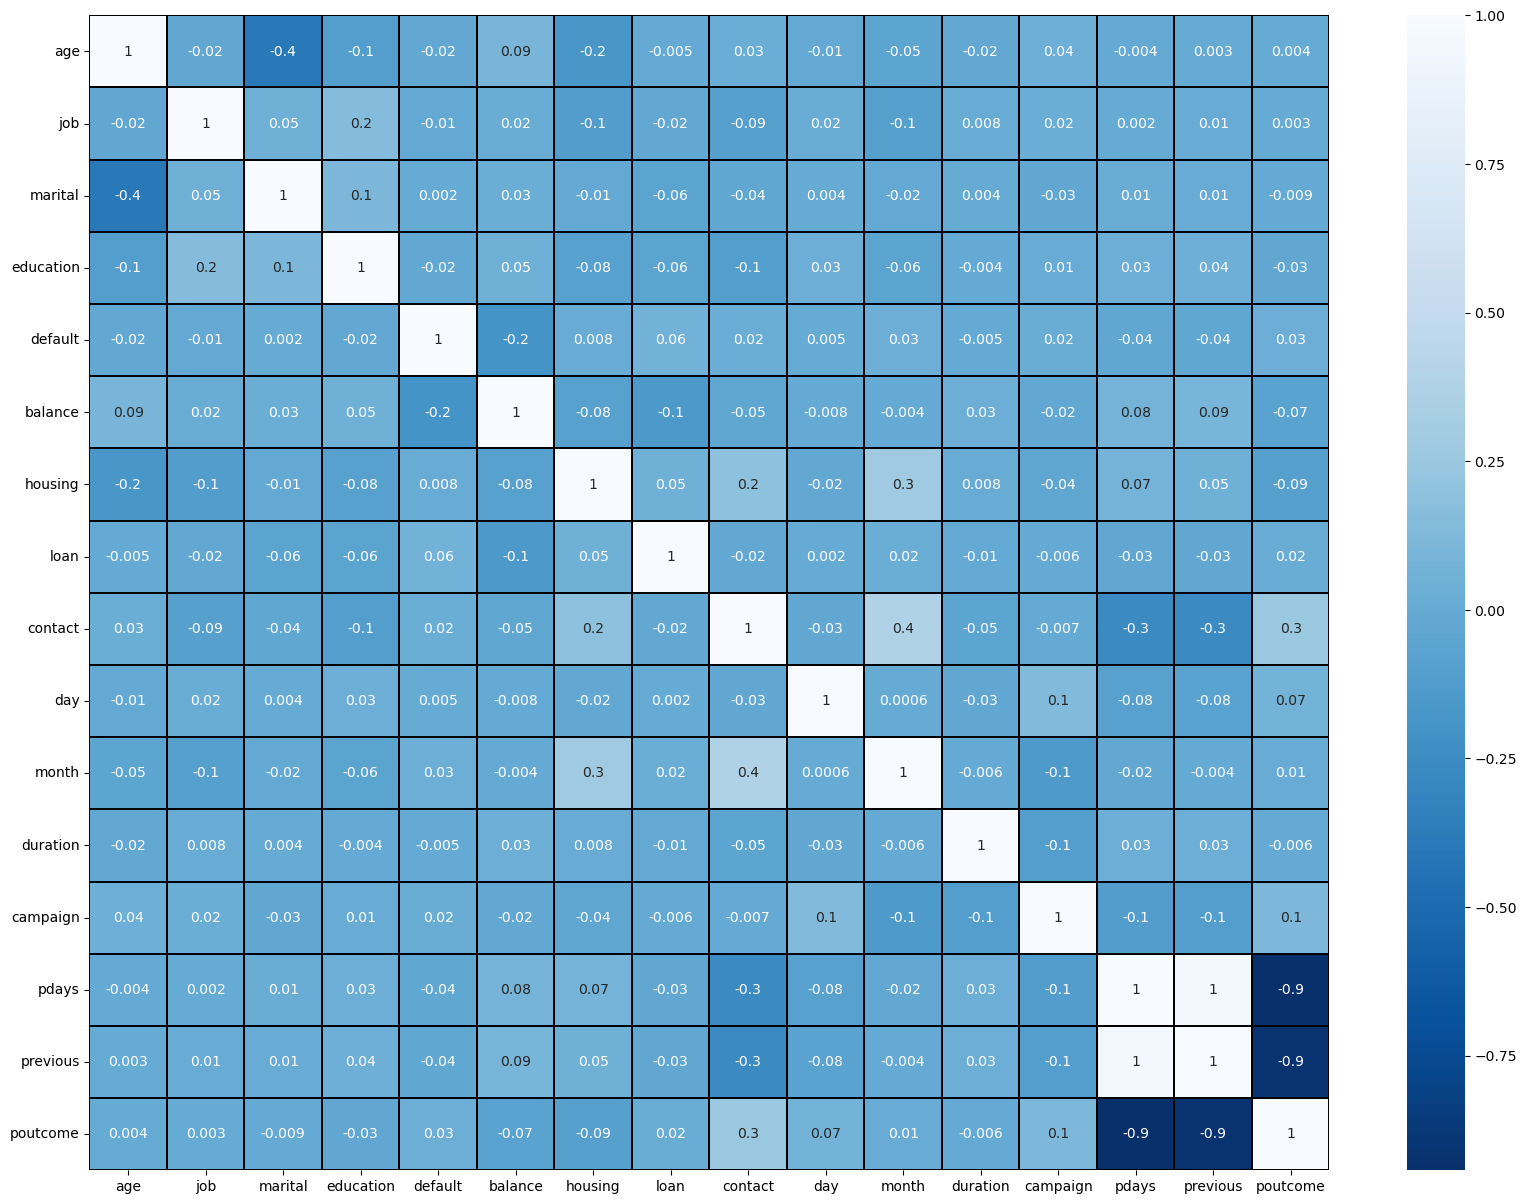

In [238]:
# visualize the correlation matrix using heat map

plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),linewidths=0.1, fmt=".1g", linecolor="black", annot=True, cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()


In [240]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df1=pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-0.857298,0.802830,-0.273350,-0.298454,-0.134234,-0.362324,0.897827,-0.436241,-0.725087,-0.085446,0.846484,-1.940045,1.840045,-0.407972,-0.404456,0.390323
1,-0.956183,0.498452,1.368116,1.050250,-0.134234,-0.307873,0.897827,-0.436241,1.472546,0.035213,0.846484,1.912430,-0.949881,-0.407972,-0.404456,0.390323
2,1.614839,0.802830,1.368116,-1.647159,-0.134234,1.363415,0.897827,-0.436241,0.373729,-0.326763,0.846484,-1.109865,-0.062423,-0.407972,-0.404456,0.390323
3,0.428213,-1.023436,-1.914817,-0.298454,-0.134234,-2.595425,-1.113800,2.292308,1.472546,-1.533350,-0.156594,-0.610877,-0.949881,-0.407972,-0.404456,0.390323
4,-0.857298,-0.110303,1.368116,1.050250,-0.134234,-1.155737,0.897827,-0.436241,-0.725087,0.759165,-0.156594,1.222888,-0.062423,-0.407972,-0.404456,0.390323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12029,-0.857298,1.411585,1.368116,-0.298454,-0.134234,-0.338398,0.897827,-0.436241,-0.725087,-1.050715,0.846484,0.130259,-0.949881,-0.407972,-0.404456,0.390323
12030,-0.165099,-0.110303,-0.273350,1.050250,-0.134234,-0.580373,-1.113800,-0.436241,-0.725087,1.483117,-1.494030,-0.303493,1.055705,-0.407972,-0.404456,0.390323
12031,1.318182,-1.023436,-0.273350,-1.647159,-0.134234,0.973614,0.897827,-0.436241,1.472546,0.517848,0.177765,-0.229425,-0.949881,-0.407972,-0.404456,0.390323
12032,-0.560641,0.194074,-0.273350,-1.647159,-0.134234,-0.091217,0.897827,-0.436241,-0.725087,1.603776,-0.490953,-0.396920,-0.949881,-0.407972,-0.404456,0.390323


In [241]:
# checking variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]
vif['Features'] = df1.columns

vif

,VIF Values,Features
0,1.270220,age
1,1.044944,job
2,1.216617,marital
3,1.062032,education
4,1.042771,default
5,1.087046,balance
6,1.183710,housing
7,1.033811,loan
8,1.324122,contact
9,1.027210,day


In [243]:
df1.drop('pdays',axis=1,inplace=True)
df1.head()

KeyError: "['pdays'] not found in axis"

In [244]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,-0.857298,0.802830,-0.273350,-0.298454,-0.134234,-0.362324,0.897827,-0.436241,-0.725087,-0.085446,0.846484,-1.940045,1.840045,-0.404456,0.390323
1,-0.956183,0.498452,1.368116,1.050250,-0.134234,-0.307873,0.897827,-0.436241,1.472546,0.035213,0.846484,1.912430,-0.949881,-0.404456,0.390323
2,1.614839,0.802830,1.368116,-1.647159,-0.134234,1.363415,0.897827,-0.436241,0.373729,-0.326763,0.846484,-1.109865,-0.062423,-0.404456,0.390323
3,0.428213,-1.023436,-1.914817,-0.298454,-0.134234,-2.595425,-1.113800,2.292308,1.472546,-1.533350,-0.156594,-0.610877,-0.949881,-0.404456,0.390323
4,-0.857298,-0.110303,1.368116,1.050250,-0.134234,-1.155737,0.897827,-0.436241,-0.725087,0.759165,-0.156594,1.222888,-0.062423,-0.404456,0.390323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12029,-0.857298,1.411585,1.368116,-0.298454,-0.134234,-0.338398,0.897827,-0.436241,-0.725087,-1.050715,0.846484,0.130259,-0.949881,-0.404456,0.390323
12030,-0.165099,-0.110303,-0.273350,1.050250,-0.134234,-0.580373,-1.113800,-0.436241,-0.725087,1.483117,-1.494030,-0.303493,1.055705,-0.404456,0.390323
12031,1.318182,-1.023436,-0.273350,-1.647159,-0.134234,0.973614,0.897827,-0.436241,1.472546,0.517848,0.177765,-0.229425,-0.949881,-0.404456,0.390323
12032,-0.560641,0.194074,-0.273350,-1.647159,-0.134234,-0.091217,0.897827,-0.436241,-0.725087,1.603776,-0.490953,-0.396920,-0.949881,-0.404456,0.390323


In [245]:
# again checking variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]
vif['Features'] = df1.columns

vif

,VIF Values,Features
0,1.270175,age
1,1.044788,job
2,1.216497,marital
3,1.061667,education
4,1.042710,default
5,1.086974,balance
6,1.179027,housing
7,1.033679,loan
8,1.323114,contact
9,1.026763,day


In [246]:
#lets load the saved model and get the predictions

model=joblib.load('Bank Marketing subscription prediction.pkl')

#prediction
prediction=model.predict(df1)
prediction

array([0., 0., 0., ..., 0., 0., 1.])

In [255]:
a1=np.array(df1)
df1=pd.DataFrame()
df1['Predicted']=prediction
df1['Original']=a1
df1

,Predicted,Original
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
12029,0.0,0.0
12030,0.0,0.0
12031,0.0,0.0
12032,0.0,0.0
